# 간단한 MLP 구현
시계열 데이터의 패턴을 학습하여 다음 값을 예측하는 모델
    * 입력 [10, 20, 30] => 출력 40
    * 출력 [20, 30, 40] => 출력 50

In [181]:
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# 주피터 노트북에서 plot을 보기 위해 선언
%matplotlib inline

## 학습 데이터 구성
sequence를 학습에 사용할 데이터로 변환
    * 입력 데이터(X)는 sequence에서 n_steps 단위로 분리하여 구성
    * 출력 데이터(y)는 입력 데이터 다음 순서에 오는 값

In [182]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
            
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return array(X), array(y)

In [183]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps) # 3개 단위로 끊어서 시퀀스 생성

In [184]:
X

array([[10, 20, 30],
       [20, 30, 40],
       [30, 40, 50],
       [40, 50, 60],
       [50, 60, 70],
       [60, 70, 80]])

In [185]:
y

array([40, 50, 60, 70, 80, 90])

## MLP 모델 구성

In [186]:
# define model
model = Sequential() # 모델 초기화
model.add(Dense(100, activation = 'relu', input_dim = n_steps))
model.add(Dense(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [187]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


## 학습

In [188]:
# fit model
learn_log = model.fit(X, y, epochs=200, verbose=0)

## Traing loss 확인

Epochs : 200


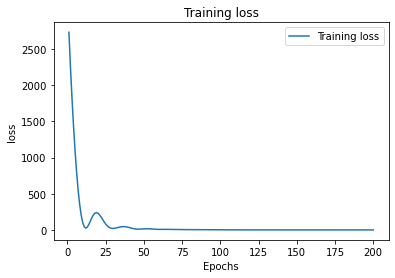

In [189]:
# training loss
loss = learn_log.history['loss']

epochs = range(1, len(loss) + 1)
print('Epochs : %d' % len(epochs))

pyplot.plot(epochs, loss, label='Training loss')
pyplot.title('Training loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('loss')
pyplot.legend()

pyplot.show()

In [190]:
loss[-5:]

[0.000319961691275239,
 0.0003190362185705453,
 0.00031827788916416466,
 0.00031766152824275196,
 0.0003169954288750887]

## 예측

In [147]:
# demonstrate prediction
x_input = array([70, 80, 90])
print('Input :', x_input)

x_input = x_input.reshape((1, n_steps))
print('Reshaped Input :', x_input)

yhat = model.predict(x_input, verbose=0)
print('Prediction : %.3f' % yhat)

Input : [70 80 90]
Reshaped Input : [[70 80 90]]
Prediction : 101.541
